In [2]:
include("backend.jl")

eulermethod

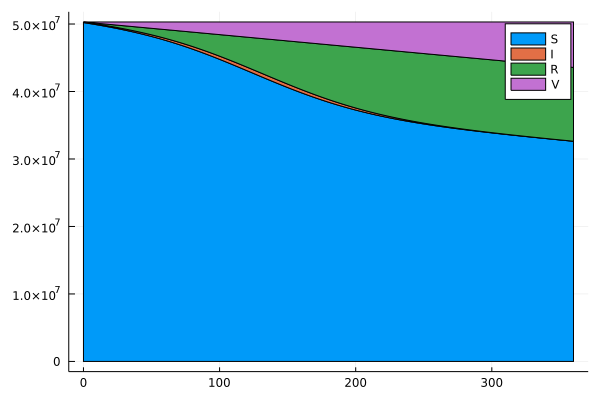

In [13]:
function vaccine_rate(t)
    return 20776
end

function derivative(X::Vector{Vector{Float64}}, N::Float64, 
        β::Float64, γ::Float64, α::Float64)

    t, S, I, R, V = X[end]
    vaccinated_today = min(S, α * vaccine_rate(t))
    infected_today = min(S, β * S * I / N)
    recovered_today = min(I, γ * I)

    dtdt = 1
    dSdt = (-infected_today - vaccinated_today)
    dIdt = (infected_today - recovered_today)
    dRdt = recovered_today
    dVdt = vaccinated_today
    return [dtdt, dSdt, dIdt, dRdt, dVdt]
end


effective_contact_rate = 0.149
recovery_rate = 1.0/8.0
vaccine_efficacy = 0.9
total_pop = 50300000.0
recovered = 0.0
infected = 86437.0
vaccinated = 0.0
susceptible = total_pop - infected - recovered
stopping_condition = X -> X[end][1] >= 360

solution = eulermethod(convert(Vector{Float64},[0,susceptible, infected, 
    recovered, vaccinated]),
    derivative, 2.0^0, stopping_condition,
    args=[total_pop,effective_contact_rate,recovery_rate,
    vaccine_efficacy])

ts = [solution[i][1] for i ∈ 1:length(solution)]
SIRV = [solution[i][j] for i ∈ 1:length(solution), j ∈ 2:length(solution[1])]

stackedarea(ts, SIRV, labels=["S" "I" "R" "V"])